In [6]:
import pandas as pd
import numpy as np
from math import sqrt

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

In [7]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_tree

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [9]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [10]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [11]:
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
train_df.shape

(1460, 81)

In [13]:
test_df.shape

(1459, 80)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data Visualisation

get correlations of each features in dataset Plotting Heat Map to visualise correlation data better. Drwan for only features having high correlation 
(>0.4) with Target Variable

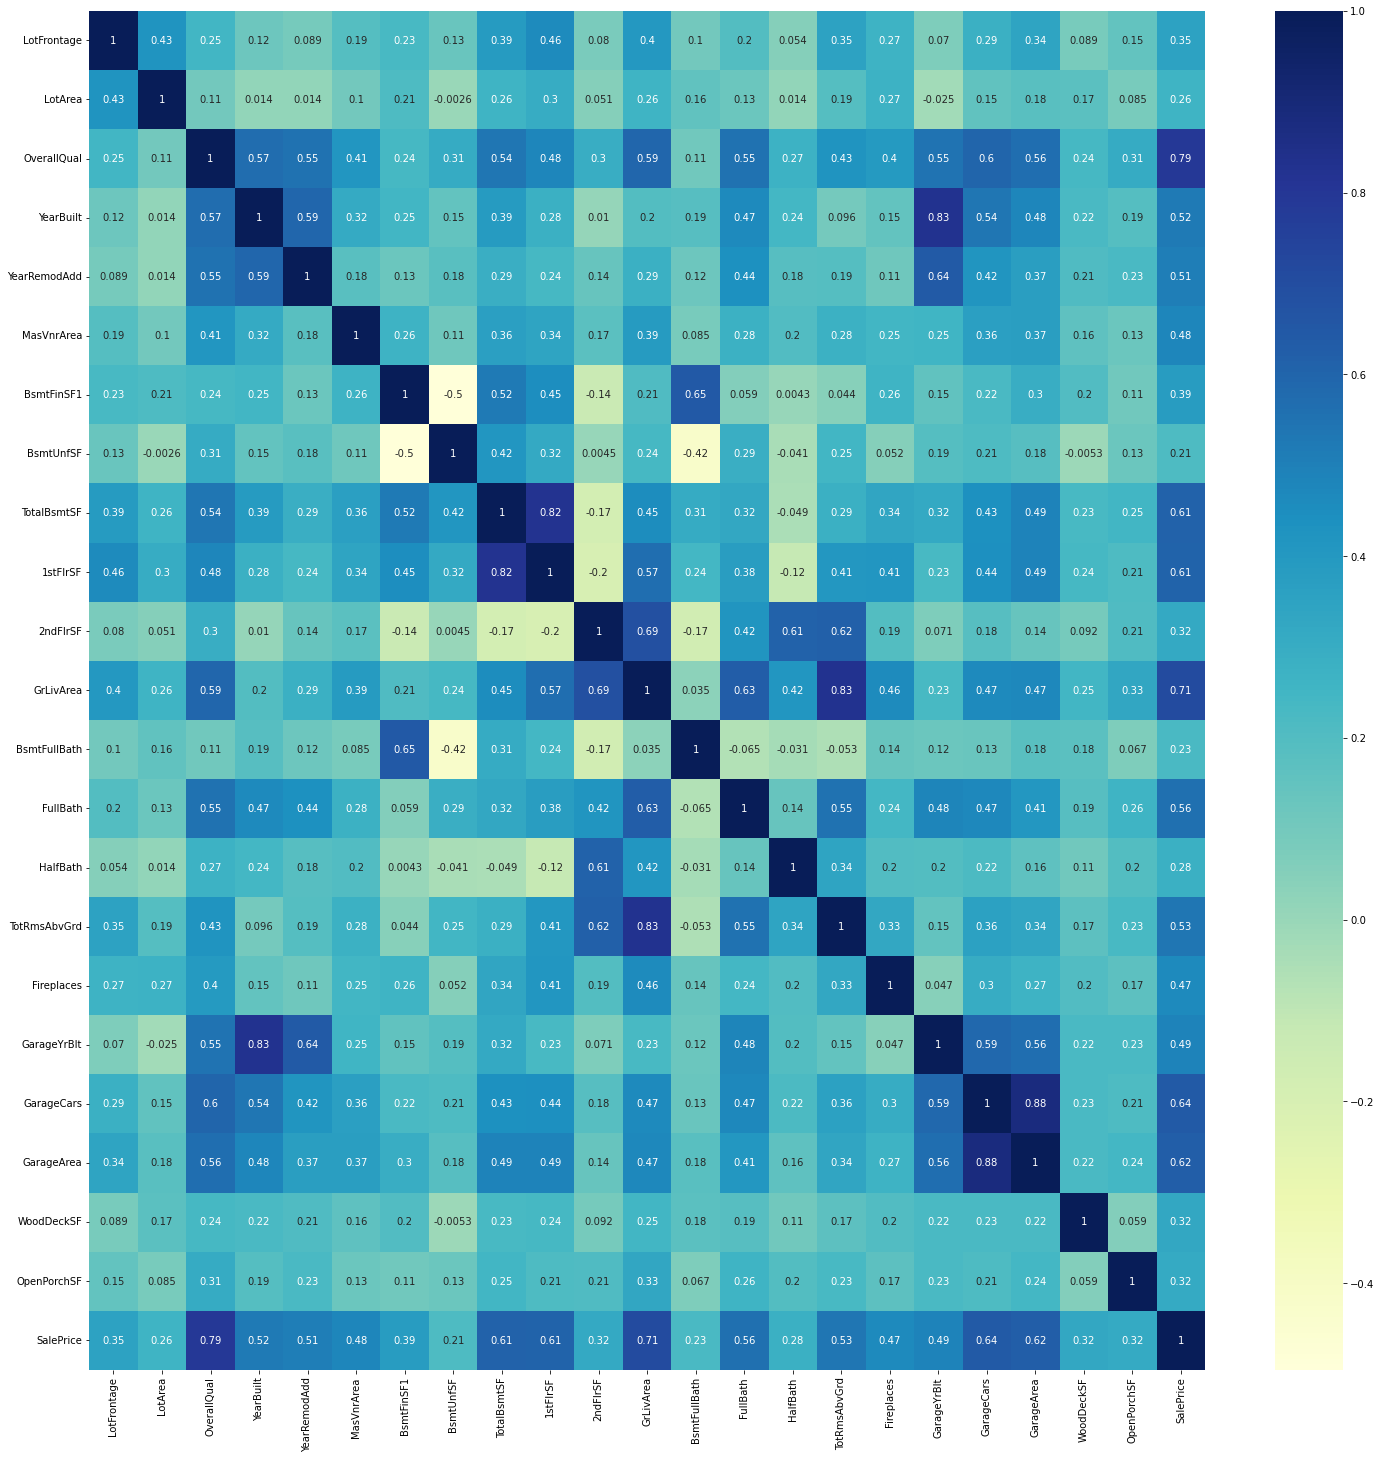

In [16]:
corr = train_df.corr()
top_corr_features = corr.index[abs(corr["SalePrice"])>0.2]

plt.figure(figsize=(25,25))
g=sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="YlGnBu")

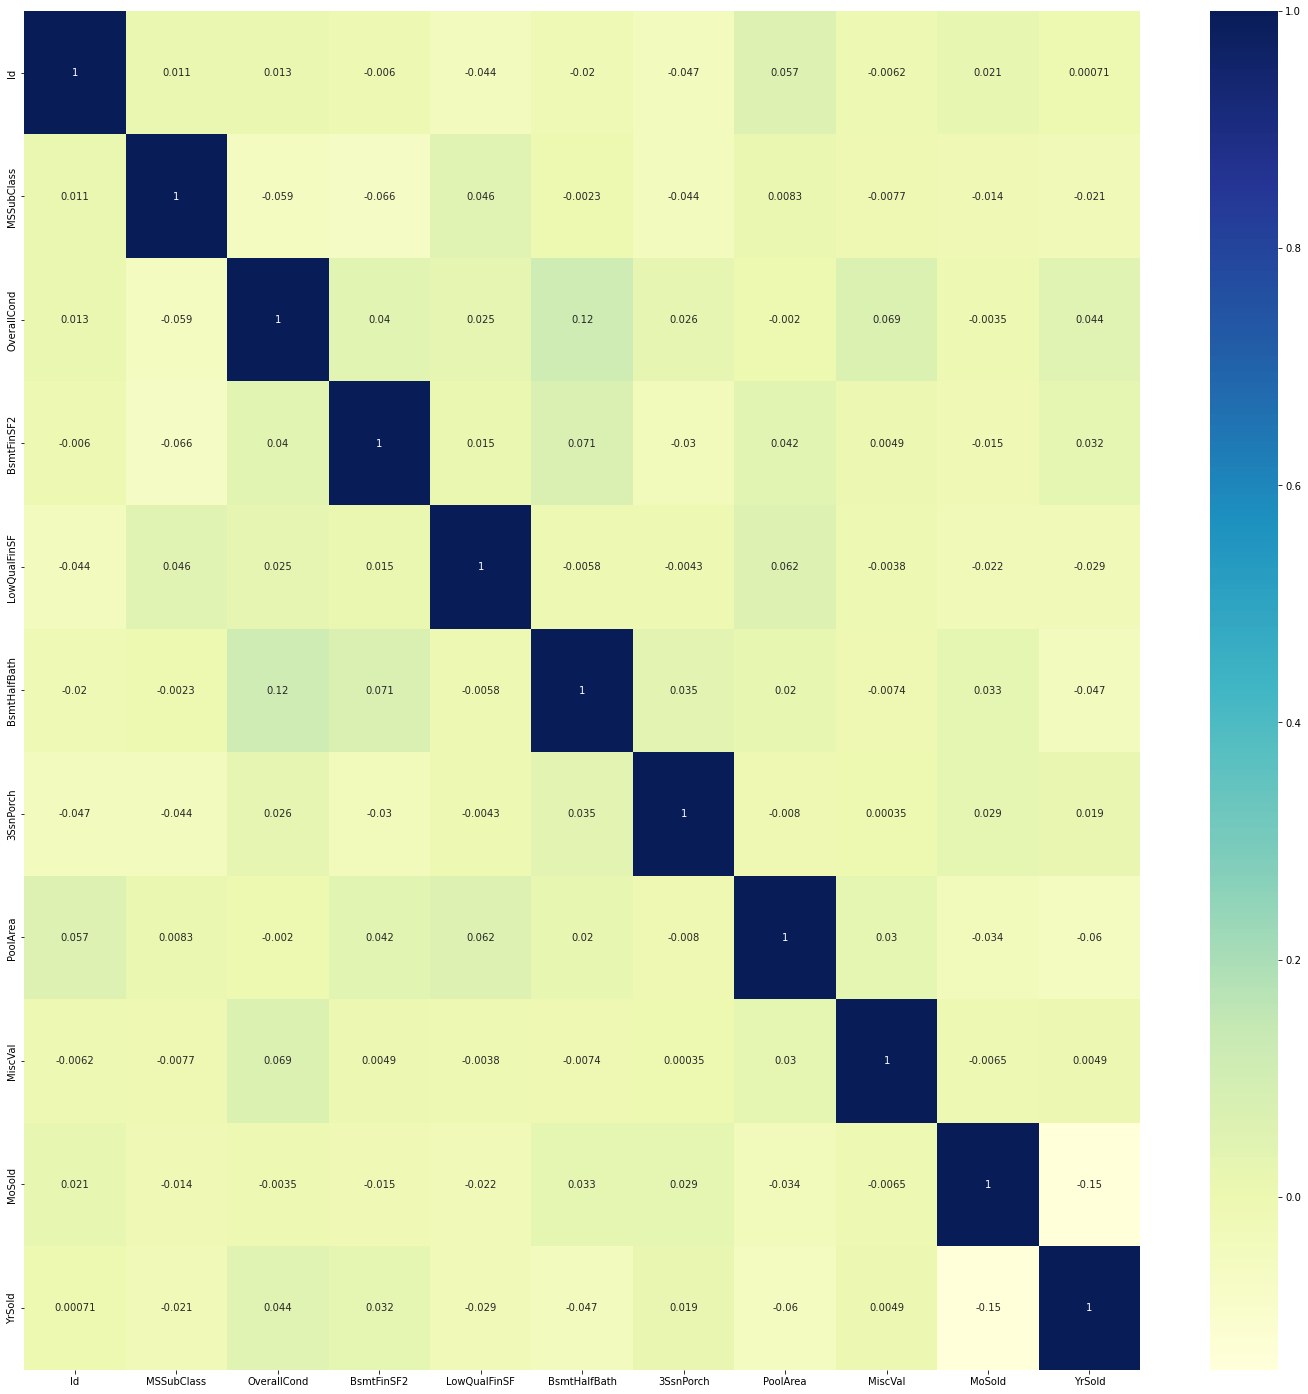

In [17]:
corr = train_df.corr()
top_corr_features = corr.index[abs(corr["SalePrice"])<=0.1]

plt.figure(figsize=(25,25))
g=sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="YlGnBu")

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

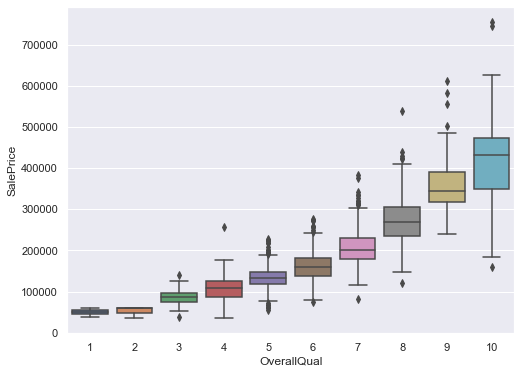

In [18]:
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df)

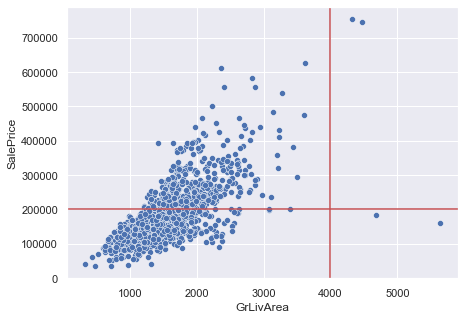

In [19]:
sns.set(rc={'figure.figsize':(7,5)})
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df)
plt.axhline(y=200000, color='r')
plt.axvline(x=4000, color='r')

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

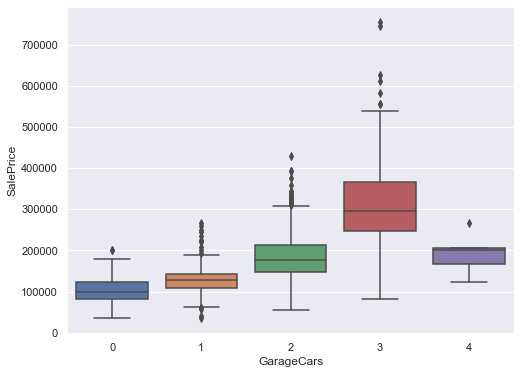

In [20]:
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(x='GarageCars', y='SalePrice', data=train_df)

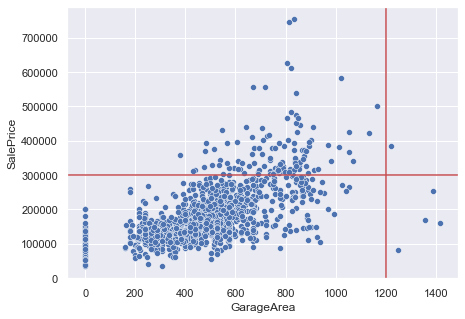

In [21]:
sns.set(rc={'figure.figsize':(7,5)})
sns.scatterplot(x='GarageArea', y='SalePrice', data=train_df)
plt.axvline(x=1200, color='r')
plt.axhline(y=300000, color='r')

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

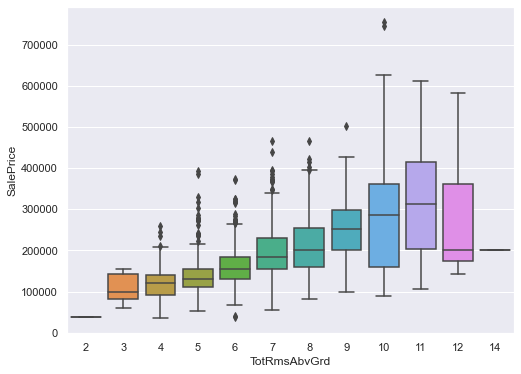

In [22]:
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=train_df)

<Figure size 640x320 with 0 Axes>

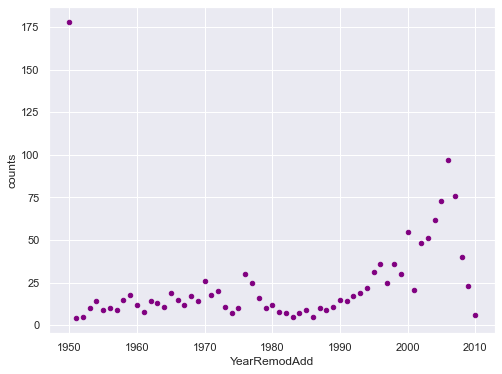

In [23]:
figure(figsize=(8, 4), dpi=80)
dt = train_df['YearRemodAdd'].value_counts().rename_axis('YearRemodAdd').reset_index(name='counts')
ax2 = dt.plot.scatter(x='YearRemodAdd', y='counts', c='purple', colormap='viridis')
plt.show()

# Handling missing data

In [24]:
def missing_percent_of_column(train_set):
    nan_percent = 100*(train_set.isnull().sum()/len(train_set))
    nan_percent = nan_percent[nan_percent>0].sort_values(ascending=False).round(1)
    DataFrame = pd.DataFrame(nan_percent)
    # Rename the columns
    mis_percent_table = DataFrame.rename(columns = {0 : '% of Misiing Values'}) 
    # Sort the table by percentage of missing descending
    mis_percent = mis_percent_table
    return mis_percent

In [25]:
miss = missing_percent_of_column(train_df)
miss

,% of Misiing Values
PoolQC,99.5
MiscFeature,96.3
Alley,93.8
Fence,80.8
FireplaceQu,47.3
LotFrontage,17.7
GarageType,5.5
GarageYrBlt,5.5
GarageFinish,5.5
GarageQual,5.5


First 4 rows have more than 80% data missing, & these 4 column will not have bigger impact on deciding sales price,its better to remove them.

As seen in heatmap, we had seen few columns have correlation with the SalePrice column close to 0, we can remove such columns, as they wont help in predicting price. 

In [26]:
train_df = train_df.drop(['Id','Alley','PoolQC','MiscFeature','Fence','MiscVal','EnclosedPorch','ScreenPorch','3SsnPorch','LowQualFinSF','MSSubClass'], axis=1)

In [27]:
test_df = test_df.drop(['Alley','PoolQC','MiscFeature','Fence','MiscVal','EnclosedPorch','ScreenPorch','3SsnPorch','LowQualFinSF','MSSubClass'], axis=1)

Lets starting replacing null values

In [28]:
train_df['FireplaceQu']= train_df['FireplaceQu'].fillna('NA')
test_df['FireplaceQu']= test_df['FireplaceQu'].fillna('NA')

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

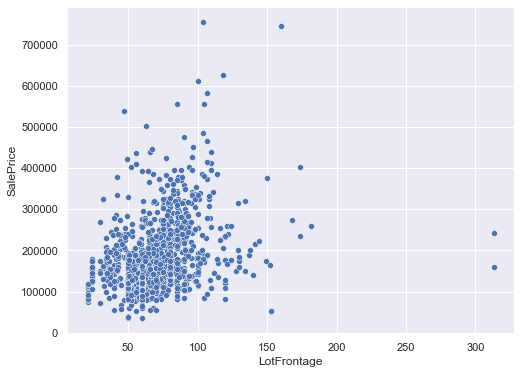

In [29]:
sns.set(rc={'figure.figsize':(8,6)})
sns.scatterplot(x='LotFrontage', y='SalePrice', data=train_df)

In [30]:
train_df['LotFrontage']= train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())
test_df['LotFrontage']= test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())

In [31]:
train_df['GarageCond']= train_df['GarageCond'].fillna('TA')
test_df['GarageCond']= test_df['GarageCond'].fillna('TA')

In [32]:
train_df['GarageQual']= train_df['GarageQual'].fillna('TA')
test_df['GarageQual']= test_df['GarageQual'].fillna('TA')

In [33]:
train_df['GarageFinish']= train_df['GarageFinish'].fillna('RFn')
test_df['GarageFinish']= test_df['GarageFinish'].fillna('RFn')

In [34]:
train_df['GarageYrBlt']= train_df['GarageYrBlt'].fillna(train_df['YearRemodAdd'])
test_df['GarageYrBlt']= test_df['GarageYrBlt'].fillna(test_df['YearRemodAdd'])

In [35]:
train_df['GarageType']= train_df['GarageType'].fillna('Attchd')
test_df['GarageType']= test_df['GarageType'].fillna('Attchd')

In [36]:
train_df['BsmtFinType2']= train_df['BsmtFinType2'].fillna('None')
test_df['BsmtFinType2']= test_df['BsmtFinType2'].fillna('None')

In [37]:
train_df['BsmtExposure']= train_df['BsmtExposure'].fillna('Mn')
test_df['BsmtExposure']= test_df['BsmtExposure'].fillna('Mn')

In [38]:
train_df['BsmtFinType1']= train_df['BsmtFinType1'].fillna('None')
test_df['BsmtFinType1']= test_df['BsmtFinType1'].fillna('None')

In [39]:
train_df['BsmtCond']= train_df['BsmtCond'].fillna('TA')
test_df['BsmtCond']= test_df['BsmtCond'].fillna('TA')

In [40]:
train_df['BsmtQual']= train_df['BsmtQual'].fillna('TA')
test_df['BsmtQual']= test_df['BsmtQual'].fillna('TA')

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

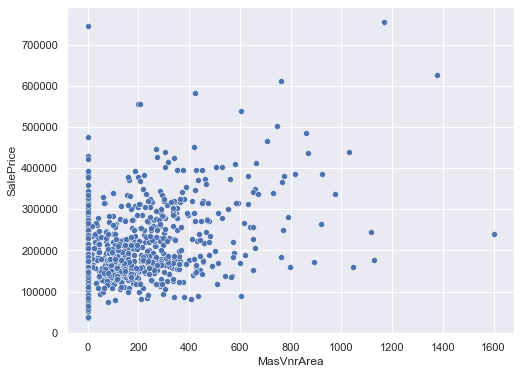

In [41]:
sns.set(rc={'figure.figsize':(8,6)})
sns.scatterplot(x='MasVnrArea', y='SalePrice', data=train_df)

In [42]:
train_df['MasVnrArea']= train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean())
test_df['MasVnrArea']= test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean())

In [43]:
train_df['MasVnrType']= train_df['MasVnrType'].fillna('Other')
test_df['MasVnrType']= test_df['MasVnrType'].fillna('Other')

In [44]:
train_df= train_df.dropna(axis=0, subset=['Electrical'])

# Handle outliers

In above graph where we have compared price with column 'GrLivArea', we did see few outlier values. We can remove those values to ensure those entries are not impacting our model.

In [45]:
#Deleting outliers
train_df = train_df.drop(train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<300000)].index)

In [46]:
train_df = train_df[(train_df['LotFrontage']<300)]

In [47]:
train_df.shape

(1456, 70)

# Converting to number

In [48]:
test_id = test_df["Id"]

In [49]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Iterate over column names
for column in train_df:
    if train_df[column].dtype.kind == 'O':
        train_df[column]= label_encoder.fit_transform(train_df[column])
        test_df[column]= label_encoder.fit_transform(test_df[column].astype(str)) 

In [50]:
test_df['BsmtFinSF1']= test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean())
test_df['BsmtFinSF2']= test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean())
test_df['BsmtUnfSF']= test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean())
test_df['TotalBsmtSF']= test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())
test_df['BsmtFullBath']= test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mean())
test_df['BsmtHalfBath']= test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mean())
test_df['GarageCars']= test_df['GarageCars'].fillna(test_df['GarageCars'].mean())
test_df['GarageArea']= test_df['GarageArea'].fillna(test_df['GarageArea'].mean())

# Model Training

In [51]:
from sklearn.model_selection import train_test_split

X =  train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]

# split into train and test sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)

X_test  = test_df.drop("Id", axis=1).copy()

In [52]:
X_train.shape, X_valid.shape, y_train.shape,y_valid.shape, X_test.shape

((1164, 69), (292, 69), (1164,), (292,), (1459, 69))

**Random Forest Regressor**

In [53]:
# fit the model
regr = RandomForestRegressor(bootstrap=False,max_depth= 15,max_features= 'sqrt',min_samples_leaf= 2,n_estimators=300)
regr.fit(X_train, y_train)

# evaluate the model
y_pred_v = regr.predict(X_valid)

#Calculate RMSE
rms = sqrt(mean_squared_error(y_valid, y_pred_v))
print('RMSE: %.3f' % rms)

RMSE: 23631.932


**Linear Regression**

In [54]:
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model
y_pred_v = model.predict(X_valid)

#Calculate RMSE
rms = sqrt(mean_squared_error(y_valid, y_pred_v))
print('RMSE: %.3f' % rms)

RMSE: 25482.771


**XGBRegressor**

In [68]:
from sklearn.model_selection import GridSearchCV
xgb_model = xgb.XGBRegressor()
grid = {'learning_rate': [0.05,0.1, 0.2,0.3], 
        'max_depth': [4,5,6,7,8,10,12,15],
        'n_estimators': [100, 200, 300,400,500,600,800,1000],
        'colsample_bytree': [0.8, 0.9],
        'gamma'       : [1,2,3,4,5,6,7,8]}

#Instantiate GridSearchCV
gscv = GridSearchCV (estimator = xgb_model, param_grid = grid, cv = 5)

#fit the model
gscv.fit(X_train, y_train)

#returns the estimator with the best performance
print(gscv.best_estimator_)

#returns the best score
print(gscv.best_score_)

#returns the best parameters
print(gscv.best_params_)

KeyboardInterrupt: 

In [ ]:
xgb_model = xgb.XGBRegressor(colsample_bytree=0.46, gamma=0.05,
                             learning_rate=0.05, max_depth=3,
                             min_child_weight=2, n_estimators=2200,
                             reg_alpha=0.5, reg_lambda=0.85, 
                             subsample=0.5,  
                             random_state=7, nthread=-1).fit(X_train, y_train)
print("Performance on train data:", xgb_model.score(X_train, y_train))

# evaluate the model
y_pred_v = xgb_model.predict(X_valid)

#Calculate RMSE
rms = sqrt(mean_squared_error(y_valid, y_pred_v))
print('RMSE: %.3f' % rms)

# Prediction

In [60]:
y_pred_x = xgb_model.predict(X_test)

In [ ]:
#Create a  DataFrame with the passengers ids and our prediction
submission = pd.DataFrame({'Id':test_id,'SalePrice':y_pred_x})

In [ ]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)